In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from src.data_loader import load_and_align_prices

plt.style.use("seaborn-v0_8")


In [2]:
prices = load_and_align_prices(
    "data/gold.csv",
    "data/silver.csv"
)

prices.head()


,gold,silver
timestamp,,
2015-01-02 00:00:00+05:30,26730.0,36235.0
2015-01-05 00:00:00+05:30,27038.0,37026.0
2015-01-06 00:00:00+05:30,27394.0,37914.0
2015-01-07 00:00:00+05:30,27161.0,37762.0
2015-01-08 00:00:00+05:30,26801.0,36954.0


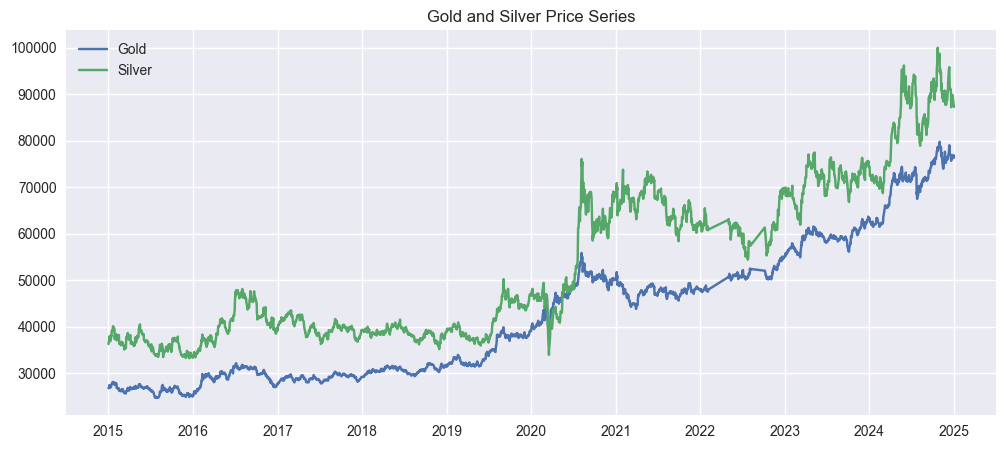

In [3]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(prices.index, prices["gold"], label="Gold")
ax.plot(prices.index, prices["silver"], label="Silver")

ax.set_title("Gold and Silver Price Series")
ax.legend()

plt.savefig("results/figures/gold_silver_price_series.png",
            dpi=300,
            bbox_inches="tight")
plt.show()


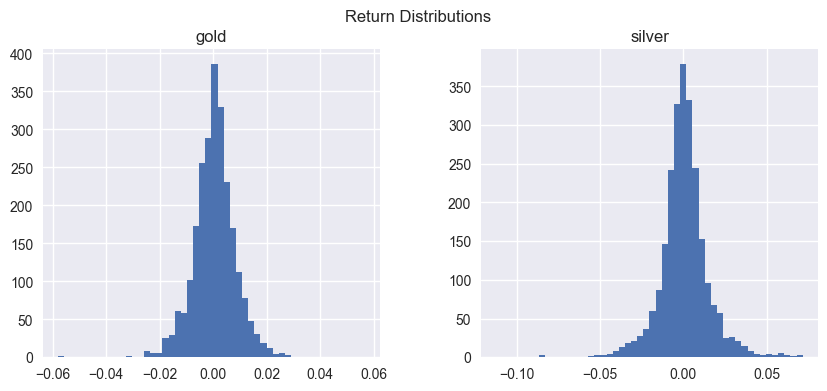

In [4]:
returns = prices.pct_change().dropna()

returns[["gold", "silver"]].hist(bins=50, figsize=(10, 4))
plt.suptitle("Return Distributions")
plt.show()


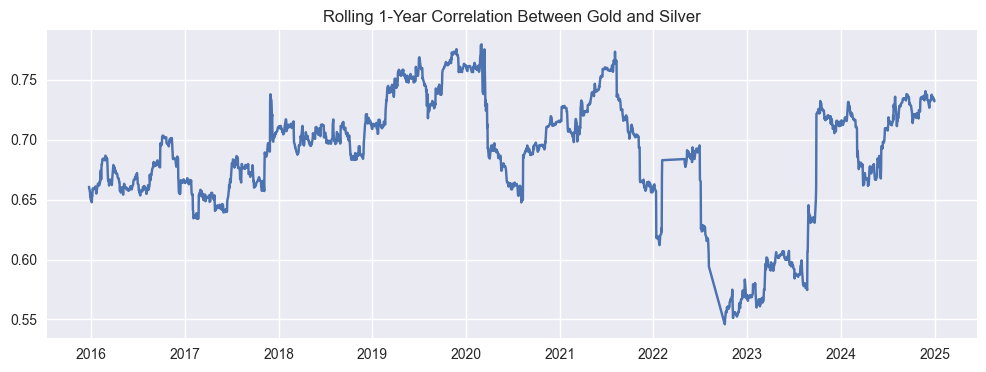

In [5]:
rolling_corr = (
    returns["gold"]
    .rolling(window=252)
    .corr(returns["silver"])
)

plt.figure(figsize=(12, 4))
plt.plot(rolling_corr)
plt.title("Rolling 1-Year Correlation Between Gold and Silver")

plt.savefig("results/figures/rolling_correlation.png",
            dpi=300,
            bbox_inches="tight")
plt.show()


In [ ]:
prices.isna().sum()
